# Netflix Movie Data

This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre. It contains titles added as recently as late September 2021.



In [1]:
import pandas as pd

df=pd.read_csv("netflix_dataset.csv", index_col=0)

[Source](https://www.kaggle.com/shivamb/netflix-shows) of dataset.

In [2]:
data=df.copy()
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Rename the column listed_in by category

In [3]:
data = data.rename(columns={"listed_in": "category" })
data.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
data.shape

(8807, 11)

In [5]:
data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'category', 'description'],
      dtype='object')

Checking the type of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   category      8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


Dropping duplicate rows

In [7]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", len(duplicate_rows_data))
print(data.count())

number of duplicate rows:  0
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
category        8807
description     8807
dtype: int64


Dropping missing values

In [8]:
print(data.isnull().sum())

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
category           0
description        0
dtype: int64


In [9]:
data = data.dropna()    
data.count()
print(data.isnull().sum())

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
category        0
description     0
dtype: int64


Question 1:
For 'Kota Factory', what is the listed_in and who is the director?

In [10]:
data[data['title'].isin(['Kota Factory'])] 

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
show_id,,,,,,,,,,,


Question 2:
In which year year a highest number of tv show and movies were released?

In [11]:
data['release_year'].value_counts()

2017    657
2018    648
2016    577
2019    519
2020    442
       ... 
1966      1
1942      1
1961      1
1945      1
1946      1
Name: release_year, Length: 72, dtype: int64

Question 3:
How many movies and tv shows are in the dataset?

In [12]:
data['type'].value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

We plot a pie chart to see the distribution of the movies and the shows in the dataset.

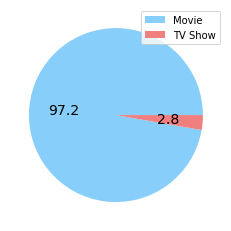

In [13]:
import matplotlib.pyplot as plt

plt.pie(data['type'].value_counts(), labels = data['type'].value_counts().index, labeldistance=None, autopct="%.1f",textprops={'fontsize': 14},colors=['lightskyblue', 'lightcoral'])
plt.legend()
plt.show()
             

Question 4:
Show all movies that were released in year 2017.

In [15]:
data[(data['type']=='Movie') & (data['release_year']==2017)]

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
show_id,,,,,,,,,,,
s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl..."
s172,Movie,Same Kind of Different as Me,Michael Carney,"Greg Kinnear, Renée Zellweger, Djimon Hounsou,...",United States,"September 1, 2021",2017,PG-13,120 min,"Dramas, Faith & Spirituality",A wealthy couple whose marriage is on the rock...
...,...,...,...,...,...,...,...,...,...,...,...
s8735,Movie,Who the F**k Is That Guy?,Drew Stone,Michael Alago,United States,"September 1, 2017",2017,TV-MA,78 min,"Documentaries, LGBTQ Movies, Music & Musicals",Take a ride through the life of record exec Mi...
s8754,Movie,Withdrawn,Adrian Murray,"Aaron Keogh, Molly Reisman, Dean Tardioli, Gre...",Canada,"May 1, 2018",2017,TV-MA,74 min,"Dramas, Independent Movies",Unable to pay bills and unwilling to change hi...
s8766,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States","June 22, 2017",2017,R,81 min,Horror Movies,This four-part anthology of short horror films...


Question 5:
Show only the title of all tv shows that were released in India.

In [16]:
data[(data['type']=='TV Show') & (data['country']=='India')] ['title']

show_id
s298                                  Navarasa
s1294                            Pitta Kathalu
s1521                          Paava Kadhaigal
s3037             Jamtara - Sabka Number Ayega
s4686                                    GHOUL
s6025                                7 (Seven)
s8173    Th Eena Meena Deeka Chase Comedy Show
Name: title, dtype: object

Question 6:
Show Top 10 directors who gave the highest number of tv shows and movies. 

In [21]:
data['director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: director, dtype: int64

Question 7:
How many movies/tv shows Tom cruise was cast?

In [36]:
data[data['cast'].str.contains('Tom Cruise')].shape

(2, 11)

Question 8:
What are the different rating?

In [30]:
data['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Question 9:
How many movies got the 'tv_14' rating in canada?

In [35]:
data[(data['type']=='Movie') & (data['rating']=='TV-14') & (data['country']=='Canada')].shape

(10, 11)

Question 10:
How many movies got 'R' rating? 

In [38]:
data[(data['type']=='Movie') & (data['rating']=='R')].shape

(778, 11)

Question 11:
What is the maximum duration of movies/tv shows on Netflix?

In [39]:
data['duration'].max()

'99 min'

Question 12:
Which country has the highest number of tv shows?

In [43]:
#create dataframe of tv shows
tv_shows=data[data['type']=='TV Show']
tv_shows.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
show_id,,,,,,,,,,,
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."


In [45]:
tv_shows['country'].value_counts()

United States                                                    27
United Kingdom                                                   19
Japan                                                            10
South Korea                                                      10
India                                                             7
Taiwan                                                            7
Spain                                                             7
France                                                            5
Thailand                                                          5
Turkey                                                            5
Brazil                                                            4
Nigeria                                                           4
Canada                                                            3
Italy                                                             2
China                                           

Question 13:
How can we sort dataset per year?

In [50]:
data.sort_values(by='release_year', ascending=False)

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
show_id,,,,,,,,,,,
s1185,Movie,The Yin Yang Master,Li Weiran,"Chen Kun, Zhou Xun, Qu Chuxiao, Shen Yue, Will...",China,"March 19, 2021",2021,TV-14,120 min,"Action & Adventure, International Movies","A feud erupts between realms, and Yin Yang mas..."
s911,Movie,Monster,Anthony Mandler,"Kelvin Harrison Jr., Jennifer Hudson, Jeffrey ...",United States,"May 7, 2021",2021,TV-MA,99 min,Dramas,A talented teen implicated in a robbery-turned...
s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."
s300,Movie,The Swarm,Just Philippot,"Suliane Brahim, Sofian Khammes, Marie Narbonne...",France,"August 6, 2021",2021,TV-14,102 min,"Horror Movies, Independent Movies, Internation...",A single mother breeds locusts as high-protein...
s301,Movie,Vivo,"Kirk DeMicco, Brandon Jeffords","Lin-Manuel Miranda, Ynairaly Simo, Zoe Saldana...","Canada, United States","August 6, 2021",2021,PG,100 min,"Children & Family Movies, Music & Musicals",A music-loving kinkajou embarks on the journey...
...,...,...,...,...,...,...,...,...,...,...,...
s8588,Movie,Thunderbolt,"William Wyler, John Sturges","James Stewart, Lloyd Bridges",United States,"March 31, 2017",1947,TV-PG,42 min,"Classic Movies, Documentaries",A P-47 Thunderbolt squadron is shown in prepar...
s7295,Movie,Let There Be Light,John Huston,Walter Huston,United States,"March 31, 2017",1946,TV-PG,58 min,"Classic Movies, Documentaries",Some returning combat veterans suffer scars th...
s7220,Movie,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,"March 31, 2017",1945,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...


Qestion 14:
Find all instances:
Where type is movie and category Drama
Where type is tv show and category comedy

In [51]:
#Where type is movie and category Dramas
data[(data['type']=='Movie') & (data['category']=='Dramas')]

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
show_id,,,,,,,,,,,
s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...
s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...
s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl..."
s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...
s344,Movie,My Girl,Howard Zieff,"Dan Aykroyd, Jamie Lee Curtis, Macaulay Culkin...",United States,"August 1, 2021",1991,PG-13,102 min,Dramas,This coming-of-age charmer follows a summer in...
...,...,...,...,...,...,...,...,...,...,...,...
s8675,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...
s8676,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",2015,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join..."
s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...


In [54]:
#Where type is tv show and category comedies
data[(data['type']=='TV Show') & (data['category'].str.contains('Comedies'))]

,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
show_id,,,,,,,,,,,
s317,TV Show,Office Girls,Hsu Fu-chun,"Roy Chiu, Alice Ko, Tia Lee, Patrick Lee, Kuo ...",Taiwan,"August 3, 2021",2011,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A department store mogul has his son work inco...
s759,TV Show,Feel Good,Ally Pankiw,"Mae Martin, Charlotte Ritchie, Lisa Kudrow, So...",United Kingdom,"June 4, 2021",2021,TV-MA,2 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",Stand-up comic Mae Martin navigates a passiona...
s989,TV Show,Let's Fight Ghost,Kongkiat Khomsiri,"Suppapong Udomkaewkanjana, Patchanan Jiajirach...",Thailand,"April 23, 2021",2021,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A med student with a supernatural gift tries t...
s1361,TV Show,The House Arrest of Us,Richard Arellano,"Daniel Padilla, Kathryn Bernardo, Herbert Baut...",Philippines,"February 1, 2021",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A couple decides to make their engagement offi...
s1531,TV Show,Schulz Saves America,Alexx Media,Andrew Schulz,United States,"December 17, 2020",2020,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedian Andrew Schulz takes on the year's mos...
s1655,TV Show,Before 30,BB Sasore,"Damilola Adegbite, O.C. Ukeje, Beverly Naya, M...",Nigeria,"November 24, 2020",2015,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Four female friends in the fast-paced city of ...
s2023,TV Show,Julie and the Phantoms,Kenny Ortega,"Madison Reyes, Charlie Gillespie, Owen Patrick...",United States,"September 10, 2020",2020,TV-G,1 Season,"Kids' TV, TV Comedies",Julie lost her passion for music when she lost...
s2276,TV Show,Hook,Rachit Kusonkoonsiri,"Peemapol Panichtamrong, Phiravich Attachitsata...",Thailand,"July 5, 2020",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Despite their fathers' rivalry, two university..."
s2481,TV Show,Trailer Park Boys: The Animated Series,"Norm Hiscock, Gary Howsam, Mike Smith, John Pa...","Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,"May 22, 2020",2020,TV-MA,2 Seasons,TV Comedies,Nova Scotia’s favorite miscreants have always ...
